# Data Preprocessing

In [365]:
# Read csv from data/train.csv

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.distance import geodesic


In [366]:
df = pd.read_csv("data/raw_data.csv", header=0, names=["lsoa_a", "lsoa_b", "day", "hour", "label"])

In [367]:
df

,lsoa_a,lsoa_b,day,hour,label
0,E01000802,E01000423,Sunday,19:01,0
1,E01000715,E01000501,Friday,14:55,1
2,E01000400,E01000866,Sunday,21:52,1
3,E01000529,E01000900,Tuesday,04:24,0
4,E01000183,E01000918,Tuesday,20:16,1
...,...,...,...,...,...
99995,E01000703,E01000963,Wednesday,13:18,0
99996,E01000119,E01000531,Saturday,21:25,0
99997,E01000572,E01000740,Thursday,20:32,0
99998,E01000465,E01000209,Thursday,16:21,0


In [368]:
df_encoded = df.copy()

In [369]:
gdf = pd.read_csv("data/LSOA.csv") 
gdf

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,Shape__Area,Shape__Length,GlobalID
0,1,E01000001,City of London 001A,,532123,181632,51.51817,-0.097150,1.577948e+05,1685.391557,3478c558-3297-4e2b-979e-e29dd9ff3bf5
1,2,E01000002,City of London 001B,,532480,181715,51.51883,-0.091970,1.648821e+05,1804.827316,f2072109-b1ae-426c-b166-083cc32f1789
2,3,E01000003,City of London 001C,,532239,182033,51.52174,-0.095330,4.221605e+04,909.253080,a9009c33-9b6b-4230-ba62-fc3264806de4
3,4,E01000005,City of London 001E,,533581,181283,51.51469,-0.076280,2.127007e+05,2028.716721,86aee0aa-079f-4f92-8f9d-5773824f4945
4,5,E01000006,Barking and Dagenham 016A,,544994,184274,51.53875,0.089317,1.305512e+05,1716.731235,c33f1f5b-6b15-47a1-b046-b6a148a9f6d3
...,...,...,...,...,...,...,...,...,...,...,...
35667,35668,W01002036,Vale of Glamorgan 005G,Bro Morgannwg 005G,317939,172435,51.44494,-3.182180,4.411147e+05,2800.544728,f79ed9c6-8220-49d9-9a69-e80e9f0007cb
35668,35669,W01002037,Vale of Glamorgan 005H,Bro Morgannwg 005H,318527,172406,51.44476,-3.173710,2.321998e+05,2088.259479,fdd8e9dc-8504-4955-aa8d-e4cff563ed76
35669,35670,W01002038,Vale of Glamorgan 014G,Bro Morgannwg 014G,306491,167360,51.39754,-3.345520,3.496360e+06,10460.433787,7b56d7b1-48e6-4883-a46e-3bd00345bc8c
35670,35671,W01002039,Vale of Glamorgan 014H,Bro Morgannwg 014H,306564,166023,51.38553,-3.344120,5.819288e+05,3094.046530,36d00276-9970-4f4b-9322-5b89fdacf0c3


In [370]:
# Obtener valores únicos de LSOA
unique_lsoas = list(set(df["lsoa_a"].tolist() + df["lsoa_b"].tolist()))
print(f"Number of unique LSOAs: {len(unique_lsoas)}")

# Crear mapeo
lsoa2idx = {lsoa: idx for idx, lsoa in enumerate(unique_lsoas)}
idx2lsoa = {idx: lsoa for lsoa, idx in lsoa2idx.items()}
lsoa2coords = {lsoa: (tuple(gdf[gdf["LSOA21CD"] == lsoa]["LONG"].values), tuple(gdf[gdf["LSOA21CD"] == lsoa]["LAT"].values)) for lsoa in unique_lsoas}
coords2lsoa = {coords: lsoa for lsoa, coords in lsoa2coords.items()}
day2idx = {day: idx for idx, day in enumerate(sorted(set(df["day"].tolist())))}
idx2day = {idx: day for day, idx in day2idx.items()}

# Crear intervalos de hora
hour_intervals = [(i, i+1) for i in range(24)]  # 0-1, 1-2, ..., 23-24

# Mapear cada hora a su intervalo correspondiente
hour2interval = {i: idx for idx, (i, _) in enumerate(hour_intervals)}

Number of unique LSOAs: 999


In [371]:
df_encoded["lsoa_a"] = df["lsoa_a"].map(lsoa2idx)
df_encoded["lsoa_b"] = df["lsoa_b"].map(lsoa2idx)
df_encoded["day"] = df["day"].map(day2idx)
df_encoded['hour'] = df['hour'].apply(lambda x: int(x.split(":")[0]))
df_encoded["hour"] = df_encoded["hour"].map(hour2interval)

In [372]:
df_encoded

,lsoa_a,lsoa_b,day,hour,label
0,883,523,3,19,0
1,859,156,0,14,1
2,271,547,3,21,1
3,363,628,5,4,0
4,884,99,5,20,1
...,...,...,...,...,...
99995,378,818,6,13,0
99996,776,450,2,21,0
99997,8,308,4,20,0
99998,131,224,4,16,0


In [373]:
# Save data as data.csv
df_encoded.to_csv("data/data.csv", index=False)

# Model

In [374]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [375]:
DATA = "data/data.csv"
data = pd.read_csv(DATA)

TRAIN_RATE=0.8

label = data['label']
attributes = data.drop(columns=['label'])


n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train))

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

x_train: (80000, 4)
t_train: (80000,)
x_dev: (20000, 4)
t_dev: (20000,)


In [376]:
INPUTS = x_train.shape[1]
OUTPUTS = 1
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

In [377]:
# Hyperparameters

n_epochs = 200
lr = 0.001
batch_size = 512
n_neurons_per_hlayer = [650, 500, 350, 350, 250, 250, 250 , 150, 100, 100]

In [378]:
input_layer = keras.layers.Input(shape=(INPUTS))
output_layer = keras.layers.Dense(units=1, activation='sigmoid')(x)

x = input_layer
for neurons in n_neurons_per_hlayer:
  x = keras.layers.Dense(units=neurons, activation = 'relu', kernel_initializer = "he_normal")(x)
  keras.layers.BatchNormalization()
output_layer = keras.layers.Dense(units=OUTPUTS, activation = 'sigmoid')(x)
model = keras.models.Model(input_layer, output_layer, name='DeepFeedForward')
model.summary()

Model: "DeepFeedForward"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_107 (Dense)            (None, 650)               3250      
_________________________________________________________________
dense_108 (Dense)            (None, 500)               325500    
_________________________________________________________________
dense_109 (Dense)            (None, 350)               175350    
_________________________________________________________________
dense_110 (Dense)            (None, 350)               122850    
_________________________________________________________________
dense_111 (Dense)            (None, 250)               87750     
_________________________________________________________________
dense_112 (Dense)            (None, 250)           

In [379]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              metrics=["binary_accuracy"])


In [380]:
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(x_dev, t_dev))

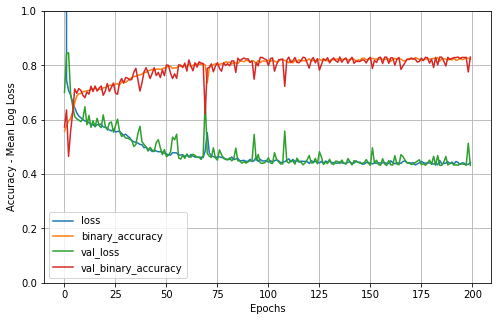

In [381]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Test

In [382]:
dev_predictions=model.predict(x_dev)
dev_rounded=tf.keras.activations.sigmoid(dev_predictions)
dev_binary = (dev_rounded < 0.5).numpy().astype(int)
dev_correct_predictions = np.equal(np.array(dev_binary),np.array(t_dev))
dev_accuracy = np.mean(dev_correct_predictions)
dev_accuracy


0.63595

# Project

In [383]:
data[["lsoa_a", "lsoa_b"]].iloc[0]

lsoa_a    883
lsoa_b    523
Name: 0, dtype: int64

In [384]:
inputs = (data["lsoa_a"].iloc[0], data["lsoa_b"].iloc[0])
inputs

(883, 523)

In [385]:
coords1 = lsoa2coords[idx2lsoa[inputs[0]]]
long1 = coords1[0][0]
lat1 = coords1[1][0]

coords2 = lsoa2coords[idx2lsoa[inputs[1]]]
long2 = coords2[0][0]
lat2 = coords2[1][0]
print(long1, lat1)
print(long2, lat2)

-0.05535 51.41925
0.07945 51.433890000000005


In [386]:
a = 'E01000400'
b = 'E01000900'
day = 'Saturday'
hour = '17:00'
hour = int(hour.split(":")[0])
hour = hour2interval[hour]
inputs = (lsoa2idx[a], lsoa2idx[b], day2idx[day], hour2interval[hour])

In [387]:
distance = geodesic((long1, lat1), (long2, lat2)).kilometers
np.array(distance).round(2)

14.99

In [397]:
def predictC(a, b, day=day, hour=hour, model=model, lsoa2idx=lsoa2idx, day2idx=day2idx, hour2interval=hour2interval):
  a_long = a[0][0]
  a_lat = a[1][0]
  b_long = b[0][0]
  b_lat = b[1][0]
  distance = geodesic((a_long, a_lat), (b_long, b_lat)).kilometers
  max_distance = 2*distance
  
  # Calculate distance from a to any point other value in unique_lsoas and keep it in a dictionary with the index of the lsoa
  #b_all_distances = {lsoa: geodesic(b, lsoa2coords[idx2lsoa[lsoa]]).kilometers for lsoa in unique_lsoas}
  b_all_distances = {}
  for lsoa in unique_lsoas:
    if len(lsoa) > 0:
      long = lsoa2coords[lsoa][0]
      lat = lsoa2coords[lsoa][1]
      if len(long) > 0 and len(lat) > 0:
        b_all_distances[lsoa] = geodesic((b_long, b_lat), (long[0], lat[0])).kilometers
  
  # Filter these distances with max_distance
  b_filtered_distances = {lsoa: distance for lsoa, distance in b_all_distances.items() if distance <= max_distance}

  # Calculate the output of the model given a and all of the filtered distances

  a_dist = {}
  for lsoa in b_filtered_distances.keys():
    inputs = (lsoa2idx[coords2lsoa[a]], lsoa2idx[lsoa], day2idx[day], hour2interval[hour])
    prediction = model.predict(np.array(inputs).reshape(1, -1))
    a_dist[lsoa] = prediction
  
  b_dist = {}
  for lsoa in b_filtered_distances.keys():
    inputs = (lsoa2idx[coords2lsoa[b]], lsoa2idx[lsoa], day2idx[day], hour2interval[hour])
    prediction = model.predict(np.array(inputs).reshape(1, -1))
    b_dist[lsoa] = prediction
  
  # Calculate the min value for the sum of the values in every same key in a and b

  min_sum = 0
  min_lsoa = None
  for lsoa in a_dist.keys():
    sum_values = a_dist[lsoa] + b_dist[lsoa]
    if sum_values > min_sum:
      min_sum = sum_values
      min_lsoa = lsoa
  
  return min_lsoa

In [398]:
c = predictC(((0.098476,), (51.46539,)), ((-0.15325999999999998,), (51.54797,)), day, hour)
c

'E01000863'

In [399]:
lsoa2coords[c]

((-0.14355,), (51.5393,))